支持向量机通常用于进行模式识别、分类以及回归分析，特别适合于安全世界里面的非黑即白。它既可以分类线性问题，又支持非线性的划分（核函数）。

常用的核函数有：

* 线性核函数K（x，y）=x·y。
* 多项式核函数K（x，y）=[（x·y）+1]^d。
* 径向基函数K（x，y）=exp（-|x-y|^2/d^2）
* 二层神经网络核函数K（x，y）=tanh（a（x·y）+b）

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2,2], np.random.randn(20,2) + [2,2]]
y = [0] * 20 + [1] * 20
clf = SVC(kernel='linear')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

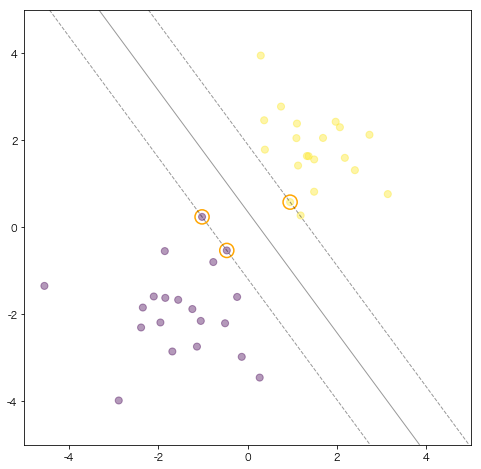

In [3]:
x1 = np.linspace(-5.0, 5.0)
x2 = np.linspace(-5.0, 5.0)
xx1, xx2 = np.meshgrid(x1, x2)
yy = clf.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
yy = yy.reshape(xx1.shape)
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], c=y, s=50, alpha=0.4)
plt.contour(xx1, xx2, yy, colors='black', levels=[-1, 0, 1], linestyles=['--','-','--'], alpha=0.4, linewidths=1.0)
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], edgecolors='orange', facecolor='none', s=200, linewidths=1.5)

对于xss的异常检测，我们通过收集正常web访问日志和xss攻击的web日志。对于收集到的数据，我们需要提取对于检测有关的数值型和类别型特征，而对于数值型的特征存在数据范围不一致的情况，对于对数据范围不一致的算法，是需要先进行数值标准化的，比如：

* 标准化；
* 均方差缩放；
* 去均值。

对于xss的特征提取，我们可以从以下几方面考虑：

* url长度
* url中包含第三方域名的个数
    * http域名的个数
    * https域名的个数
* 敏感字符的个数
    * <的个数
    * \>的个数
    * '的个数
    * "的个数
* 敏感关键字的个数
    * alert的个数
    * script的个数
    * onerror的个数
    * onload的个数
    * eval的个数
    * system的个数
    * src=的个数
    * javascript的个数
    * expression_r的个数
    * href=的个数
    * ontoggle的个数
    * onmouseover的个数
    * onclick的个数
    
常见的xss编码类型：

            url编码           html编码    javascript编码     jsunicode编码    base64编码    特殊编码    表情符号

<:           %3c              &#x3c;          \x3c             \u003c          PA==        [+[]]

\>:          %3e              &#x3e;          \x3e             \u003e          Pg==        [!+[]+!+[]]

":           %22              &#x22;          \x22             \u0022          Ig==        [+!+[]+[!+[]+!+[]]]

':           %27              &#x27;          \x27             \u0027          Jw==

alert:       %61%6c%65%72%74  &#x61;&#x6c;&#x65;&#x72;&#x74;  \x61\x6c\x65\x72\x74   \u0061\u006c\u0065\u0072\u0074  YWxlcnQ=

script:      %73%63%72%69%70%74  &#x73;&#x63;&#x72;&#x69;&#x70;&#x74;  \x73\x63\x72\x69\x70\x74  \u0073\u0063\u0072\u0069\u0070\u0074  c2NyaXB0

onerror:     %6f%6e%65%72%72%6f%72  &#x6f;&#x6e;&#x65;&#x72;&#x72;&#x6f;&#x72;  \x6f\x6e\x65\x72\x72\x6f\x72  \u006f\u006e\u0065\u0072\u0072\u006f\u0072  b25lcnJvcg==

onload:      %6f%6e%6c%6f%61%64     &#x6f;&#x6e;&#x6c;&#x6f;&#x61;&#x64;         \x6f\x6e\x6c\x6f\x61\x64   \u006f\u006e\u006c\u006f\u0061\u0064      b25sb2Fk

eval:        %65%76%61%6c           &#x65;&#x76;&#x61;&#x6c;            \x65\x76\x61\x6c      \u0065\u0076\u0061\u006c       ZXZhbA==

system:      %73%79%73%74%65%6d     &#x73;&#x79;&#x73;&#x74;&#x65;&#x6d;    \x73\x79\x73\x74\x65\x6d    \u0073\u0079\u0073\u0074\u0065\u006d    c3lzdGVt

src=:        %73%72%63%3d           &#x73;&#x72;&#x63;&#x3d;                \x73\x72\x63\x3d      \u0073\u0072\u0063\u003d   c3JjPQ==

javascript:  %6a%61%76%61%73%63%72%69%70%74  &#x6a;&#x61;&#x76;&#x61;&#x73;&#x63;&#x72;&#x69;&#x70;&#x74;  \x6a\x61\x76\x61\x73\x63\x72\x69\x70\x74     \u006a\u0061\u0076\u0061\u0073\u0063\u0072\u0069\u0070\u0074   amF2YXNjcmlwdA==

expression_r: %65%78%70%72%65%73%73%69%6f%6e%5f%72 &#x65;&#x78;&#x70;&#x72;&#x65;&#x73;&#x73;&#x69;&#x6f;&#x6e;&#x5f;&#x72;  \x65\x78\x70\x72\x65\x73\x73\x69\x6f\x6e\x5f\x72
\u0065\u0078\u0070\u0072\u0065\u0073\u0073\u0069\u006f\u006e\u005f\u0072  ZXhwcmVzc2lvbl9y

href=:        %68%72%65%66%3d      &#x68;&#x72;&#x65;&#x66;&#x3d;     \x68\x72\x65\x66\x3d   \u0068\u0072\u0065\u0066\u003d     aHJlZj0=

ontoggle:       %6f%6e%74%6f%67%67%6c%65   &#x6f;&#x6e;&#x74;&#x6f;&#x67;&#x67;&#x6c;&#x65;   \x6f\x6e\x74\x6f\x67\x67\x6c\x65    \u006f\u006e\u0074\u006f\u0067\u0067\u006c\u0065   YWN0aW9u

onmouseover:  %6f%6e%6d%6f%75%73%65%6f%76%65%72  &#x6f;&#x6e;&#x6d;&#x6f;&#x75;&#x73;&#x65;&#x6f;&#x76;&#x65;&#x72; 
\x6f\x6e\x6d\x6f\x75\x73\x65\x6f\x76\x65\x72   \u006f\u006e\u006d\u006f\u0075\u0073\u0065\u006f\u0076\u0065\u0072  b25tb3VzZW92ZXI=

onclick: %6f%6e%63%6c%69%63%6b   &#x6f;&#x6e;&#x63;&#x6c;&#x69;&#x63;&#x6b;   \x6f\x6e\x63\x6c\x69\x63\x6b
\u006f\u006e\u0063\u006c\u0069\u0063\u006b   b25jbGljaw==

http://: %68%74%74%70%3a%2f%2f  &#x68;&#x74;&#x74;&#x70;&#x3a;&#x2f;&#x2f;  \x68\x74\x74\x70\x3a\x2f\x2f  \u0068\u0074\u0074\u0070\u003a\u002f\u002f   aHR0cDovLw==

https://  %68%74%74%70%73%3a%2f%2f  &#x68;&#x74;&#x74;&#x70;&#x73;&#x3a;&#x2f;&#x2f;  \x68\x74\x74\x70\x73\x3a\x2f\x2f    \u0068\u0074\u0074\u0070\u0073\u003a\u002f\u002f  aHR0cHM6Ly8=

Python 字符串前面加'r':

在Python的string前面加上‘r’， 是为了告诉编译器这个string是个raw string，不要转意backslash '\' 。 例如，\n 在raw string中，是两个字符，\和n， 而不会转意为换行符。由于正则表达式和 \ 会有冲突，因此，当一个字符串使用了正则表达式后，最好在前面加上'r'。

In [4]:
import re
import pandas as pd
from urllib.parse import urlparse
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [5]:
def load_and_get_features(filename):
    f = open(filename, 'r')
    f1_urllen = []
    f2_n_http = []
    f3_n_https = []
    f4_n_lt = []
    f5_n_gt = []
    f6_n_apos = []
    f7_n_quot = []
    f8_n_alert = []
    f9_n_script = []
    f10_n_onerror = []
    f11_n_onload = []
    f12_n_eval = []
    f13_n_system = []
    f14_n_src = []
    f15_n_javascript = []
    f16_n_expression_r = []
    f17_n_href = []
    f18_n_ontoggle = []
    f19_n_onmouseover = []
    f20_n_onclick = []
    f21_n_iframe = []
    f22_n_prompt = []
    f23_n_confirm = []
    raw_url = []
    for line in f.readlines():
        raw_url.append(line)
        f1_urllen.append(len(line))
        f2_n_http.append(len(re.findall("http://|%68%74%74%70%3a%2f%2f|&\#x68;&\#x74;&\#x74;&\#x70;&\#x3a;&\#x2f;&\#x2f;|\\x68\\x74\\x74\\x70\\x3a\\x2f\\x2f|\\u0068\\u0074\\u0074\\u0070\\u003a\\u002f\\u002f", line, flags=re.IGNORECASE)))
        f3_n_https.append(len(re.findall("https://|%68%74%74%70%73%3a%2f%2f|&\#x68;&\#x74;&\#x74;&\#x70;&\#x73;&\#x3a;&\#x2f;&\#x2f;|\\x68\\x74\\x74\\x70\\x73\\x3a\\x2f\\x2f|\\u0068\\u0074\\u0074\\u0070\\u0073\\u003a\\u002f\\u002f|aHR0cHM6Ly8=", line, flags=re.IGNORECASE)))
        f4_n_lt.append(len(re.findall("<|%3c|&\#x3c;|\\x3c|\\u003c|PA==", line)))
        f5_n_gt.append(len(re.findall(">|%3e|&\#x3e;|\\x3e|\\u003e|Pg==", line)))
        f6_n_apos.append(len(re.findall("'|%22|&\#x22;|\\x22|\\u0022|Ig==", line)))
        f7_n_quot.append(len(re.findall("\"|%27|&\#x27;|\\x27|\\u0027|Jw==", line)))
        f8_n_alert.append(len(re.findall("alert|%61%6c%65%72%74|&\#x61;&\#x6c;&\#x65;&\#x72;&\#x74;|\\x61\\x6c\\x65\\x72\\x74|\\u0061\\u006c\\u0065\\u0072\\u0074|YWxlcnQ=", line, flags=re.IGNORECASE)))
        f9_n_script.append(len(re.findall("script|%73%63%72%69%70%74|&\#x73;&\#x63;&\#x72;&\#x69;&\#x70;&\#x74;|\\x73\\x63\\x72\\x69\\x70\\x74|\\u0073\\u0063\\u0072\\u0069\\u0070\\u0074|c2NyaXB0", line, flags=re.IGNORECASE)))
        f10_n_onerror.append(len(re.findall("onerror|%6f%6e%65%72%72%6f%72|&\#x6f;&\#x6e;&\#x65;&\#x72;&\#x72;&\#x6f;&\#x72;|\\x6f\\x6e\\x65\\x72\\x72\\x6f\\x72 |\\u006f\\u006e\\u0065\\u0072\\u0072\\u006f\\u0072|b25lcnJvcg==", line, flags=re.IGNORECASE)))
        f11_n_onload.append(len(re.findall("onload|%6f%6e%6c%6f%61%64|&\#x6f;&\#x6e;&\#x6c;&\#x6f;&\#x61;&\#x64;|\\x6f\\x6e\\x6c\\x6f\\x61\\x64|\\u006f\\u006e\\u006c\\u006f\\u0061\\u0064|b25sb2Fk", line, flags=re.IGNORECASE)))
        f12_n_eval.append(len(re.findall("eval|%65%76%61%6c|&\#x65;&\#x76;&\#x61;&\#x6c;|\\x65\\x76\\x61\\x6c|\\u0065\\u0076\\u0061\\u006c|ZXZhbA==", line, flags=re.IGNORECASE)))
        f13_n_system.append(len(re.findall("system|%73%79%73%74%65%6d |&\#x73;&\#x79;&\#x73;&\#x74;&\#x65;&\#x6d;|\\x73\\x79\\x73\\x74\\x65\\x6d|\\u0073\\u0079\\u0073\\u0074\\u0065\\u006dc3lzdGVt", line, flags=re.IGNORECASE)))
        f14_n_src.append(len(re.findall("src=|%73%72%63%3d|&\#x73;&\#x72;&\#x63;&\#x3d;|\\x73\\x72\\x63\\x3d|\\u0073\\u0072\\u0063\\u003d|c3JjPQ==", line, flags=re.IGNORECASE)))
        f15_n_javascript.append(len(re.findall("javascript|%6a%61%76%61%73%63%72%69%70%74|&\#x6a;&\#x61;&\#x76;&\#x61;&\#x73;&\#x63;&\#x72;&\#x69;&\#x70;&\#x74;|\\x6a\\x61\\x76\\x61\\x73\\x63\\x72\\x69\\x70\\x74|\\u006a\\u0061\\u0076\\u0061\\u0073\\u0063\\u0072\\u0069\\u0070\\u0074|amF2YXNjcmlwdA==", line, flags=re.IGNORECASE)))
        f16_n_expression_r.append(len(re.findall("expression_r|%65%78%70%72%65%73%73%69%6f%6e%5f%72|&\#x65;&\#x78;&\#x70;&\#x72;&\#x65;&\#x73;&\#x73;&\#x69;&\#x6f;&\#x6e;&\#x5f;&\#x72;|\\x65\\x78\\x70\\x72\\x65\\x73\\x73\\x69\\x6f\\x6e\\x5f\\x72|\\u0065\\u0078\\u0070\\u0072\\u0065\\u0073\\u0073\\u0069\\u006f\\u006e\\u005f\\u0072|ZXhwcmVzc2lvbl9y", line, flags=re.IGNORECASE)))
        f17_n_href.append(len(re.findall("href=|%68%72%65%66%3d|&\#x68;&\#x72;&\#x65;&\#x66;&\#x3d;|\\x68\\x72\\x65\\x66\\x3d|\\u0068\\u0072\\u0065\\u0066\\u003d|aHJlZj0=", line, flags=re.IGNORECASE)))
        f18_n_ontoggle.append(len(re.findall("ontoggle|%6f%6e%74%6f%67%67%6c%65|&\#x3c;|\\x6f\\x6e\\x74\\x6f\\x67\\x67\\x6c\\x65|\\u006f\\u006e\\u0074\\u006f\\u0067\\u0067\\u006c\\u0065|YWN0aW9u", line, flags=re.IGNORECASE)))
        f19_n_onmouseover.append(len(re.findall("onmouseover|%6f%6e%6d%6f%75%73%65%6f%76%65%72|&\#x6f;&\#x6e;&\#x6d;&\#x6f;&\#x75;&\#x73;&\#x65;&\#x6f;&\#x76;&\#x65;&\#x72;|\\x6f\\x6e\\x6d\\x6f\\x75\\x73\\x65\\x6f\\x76\\x65\\x72|\\u006f\\u006e\\u006d\\u006f\\u0075\\u0073\\u0065\\u006f\\u0076\\u0065\\u0072|b25tb3VzZW92ZXI=", line, flags=re.IGNORECASE)))
        f20_n_onclick.append(len(re.findall("onclick|%6f%6e%63%6c%69%63%6b|&\#x6f;&\#x6e;&\#x63;&\#x6c;&\#x69;&\#x63;&\#x6b;|\\x6f\\x6e\\x63\\x6c\\x69\\x63\\x6b|\\u006f\\u006e\\u0063\\u006c\\u0069\\u0063\\u006b|b25jbGljaw==", line, flags=re.IGNORECASE)))
        f21_n_iframe.append(len(re.findall("iframe|%69%66%72%61%6d%65|&#x69;&#x66;&#x72;&#x61;&#x6d;&#x65;|\\x69\\x66\\x72\\x61\\x6d\\x65|\\u0069\\u0066\\u0072\\u0061\\u006d\\u0065|aWZyYW1l", line, flags=re.IGNORECASE))) 
        f22_n_prompt.append(len(re.findall("prompt|%70%72%6f%6d%70%74|&#x70;&#x72;&#x6f;&#x6d;&#x70;&#x74;|\\x70\\x72\\x6f\\x6d\\x70\\x74|\\u0070\\u0072\\u006f\\u006d\\u0070\\u0074|cHJvbXB0", line, flags=re.IGNORECASE)))
        f23_n_confirm.append(len(re.findall("confirm|%63%6f%6e%66%69%72%6d|&#x63;&#x6f;&#x6e;&#x66;&#x69;&#x72;&#x6d;|\\x63\\x6f\\x6e\\x66\\x69\\x72\\x6d|\\u0063\\u006f\\u006e\\u0066\\u0069\\u0072\\u006d|Y29uZmlybQ==", line, flags=re.IGNORECASE)))
    features = pd.DataFrame({'f1_urllen':f1_urllen,
                             'f2_n_http':f2_n_http,
                             'f3_n_https':f3_n_https,
                             'f4_n_lt':f4_n_lt,
                             'f5_n_gt':f5_n_gt,
                             'f6_n_apos':f6_n_apos,
                             'f7_n_quot':f7_n_quot,
                             'f8_n_alert':f8_n_alert,
                             'f9_n_script':f9_n_script,
                             'f10_n_onerror':f10_n_onerror,
                             'f11_n_onload':f11_n_onload,
                             'f12_n_eval':f12_n_eval,
                             'f13_n_system':f13_n_system,
                             'f14_n_src':f14_n_src,
                             'f15_n_javascript':f15_n_javascript,
                             'f16_n_expression_r':f16_n_expression_r,
                             'f17_n_href':f17_n_href,
                             'f18_n_ontoggle':f18_n_ontoggle,
                             'f19_n_onmouseover':f19_n_onmouseover,
                             'f20_n_onclick':f20_n_onclick,
                             'f21_n_iframe':f21_n_iframe,
                             'f22_n_prompt':f21_n_iframe,
                             'f23_n_confirm':f21_n_iframe,                             
                             'url':raw_url})
    return features

In [6]:
white_samples = load_and_get_features('./数据集/XSS/normal-10000.txt')
white_samples['label'] = 0
black_samples = load_and_get_features('./数据集/XSS/xss-2000.txt')
black_samples['label'] = 1

xss = pd.concat([white_samples, black_samples], axis=0, ignore_index=True)

mmscaler = MinMaxScaler()
X = mmscaler.fit_transform(xss[xss.columns[:-2]])

X_train, X_test, y_train, y_test = train_test_split(X, xss['label'])

sv = SVC(kernel='linear', C=1e5)
sv.fit(X_train, y_train)
sv.score(X_test, y_test)

0.9982598607888631

In [7]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9997099767981439

In [8]:
rfc.feature_importances_

array([0.0888515 , 0.00247933, 0.00115218, 0.0022967 , 0.00669269,
       0.20560204, 0.01852306, 0.38523821, 0.1615467 , 0.00221716,
       0.00190972, 0.01407548, 0.        , 0.0174526 , 0.00812526,
       0.        , 0.00041548, 0.        , 0.0600099 , 0.        ,
       0.0103674 , 0.00626934, 0.00677523])

In [9]:
cross_val_score(rfc, X, xss['label'], cv=10)

array([1.        , 0.99927484, 0.99927484, 1.        , 1.        ,
       1.        , 0.99927484, 0.99927484, 1.        , 1.        ])

In [10]:
y_pred = rfc.predict(X_test)

In [11]:
xss.iloc[y_test[y_pred != y_test].index][['url', 'label']]

,url,label
12132,/114/post.php?action=reply&fid=17&tid=1591&ext...,1


In [12]:
xss.iloc[y_test[y_pred != y_test].index]['url'].values

array(['/114/post.php?action=reply&fid=17&tid=1591&extra=&replysubmit=yes&infloat=yes&handlekey=,prompt(42873)\n'],
      dtype=object)

对于DGA生成域名算法的检测，不同的僵尸网络家族使用的算法可能会不一样，也就可能会呈现出不同的特征。这里我们使用常见的两个僵尸家族cryptolocker和post-tovar-goz的数据集来进行训练和检测。

对于DGA域名检测的特征提取，这里是有技巧的。比如，正常人通常取域名时，会选择“好读好记”的几个字母组合，从数学的角度来理解，也就是一般英文的元音字母比例会比较高。而使用DGA生成的域名，则更具有随机性，一般元音字母这方面的特征不明显。

特征1：统计域名元音字母aeiou的比例

我们可以绘制域名长度与元音字母比例的可视化图，可以很明显的看到不同的僵尸网络家族的域名这个比例会呈现出一定的聚合性。

计算去重后的域名字母数目，这个特征也是可以用来区分DGA生成的域名和我们取的好记的域名的。

特征2：统计去重后的域名的字母个数

同样，我们也可以看到正常的域名去重后的数目统计较少，且聚集，恶意域名呈现出不同的聚合

可以想象如果是DGA生成的域名，域名之间的重合度应该会越高，因为使用的都是这一套域名生成算法，而人工取名的话，重合度会低很多。

特征3：计算两域名的平均jarccard系数

同样是保持聚合的特性

另外，考虑使用HMM系数来作为特征，因人为取名的域名元音较多，HMM系数会偏高，而DGA生成的域名随机性较大，继而HMM系数会偏低。

特征4：计算域名的HMM系数

In [13]:
def load_and_get_features1(filename, white=True, black=False):
    dga = pd.read_csv(filename, header=None)
    if white:
        features1_white = dga[1].str.count('[aeiou]') / (dga[1].str.len()-1)
        return features1_white
    if black:
        features1_black = dga[0].str.count('[aeiou]') / (dga[0].str.len()-1)
        return features1_black
    
def load_and_get_features2(filename, white=True, black=False):
    dga = pd.read_csv(filename, header=None)
    if white:
        features2_white = []
        for i in dga[1]:
            features2_white.append(len(list(set(i)))-1)
        return features2_white
    if black:
        features2_black = []
        for j in dga[0]:
            features2_black.append(len(list(set(j)))-1)
        return features2_black
    
def load_and_get_features3(filename1, filename2=None, same=True, white=True, black=False):
    if same:
        dga1 = pd.read_csv(filename1, header=None)
        dga2 = pd.read_csv(filename1, header=None)
        if white:
            domainList1 = []
            for i in range(len(dga1)):
                domainList1.append(list(dga1[1].str.replace('.','').loc[i]))
            domainList2 = []
            for i in range(len(dga2)):
                domainList2.append(list(dga2[1].str.replace('.','').loc[i]))
            del domainList2[0]
            domainList2.append([''])
            same_white_jarccard = []
            for i in range(len(domainList1)):
                intersection = len(list((set(domainList1[i]).intersection(set(domainList2[i])))))
                union = len(list((set(domainList1[i]).union(set(domainList2[i])))))
                same_white_jarccard.append(intersection/union)
            return same_white_jarccard
        if black:
            domainList1 = []
            for i in range(len(dga1)):
                domainList1.append(list(dga1[0].str.replace('.','').loc[i]))
            domainList2 = []
            for i in range(len(dga2)):
                domainList2.append(list(dga2[0].str.replace('.','').loc[i]))
            del domainList2[0]
            domainList2.append([''])
            same_black_jarccard = []
            for i in range(len(domainList1)):
                intersection = len(list((set(domainList1[i]).intersection(set(domainList2[i])))))
                union = len(list((set(domainList1[i]).union(set(domainList2[i])))))
                same_black_jarccard.append(intersection/union)
            return same_black_jarccard
    else:
        dga1 = pd.read_csv(filename1, header=None)
        dga2 = pd.read_csv(filename2, header=None)
        domainList1 = []
        for i in range(len(dga1)):
            domainList1.append(list(dga1[1].str.replace('.','').loc[i]))
        domainList2 = []
        for i in range(len(dga2)):
            domainList2.append(list(dga2[0].str.replace('.','').loc[i]))
        different_jarccard = []
        for i in range(len(domainList1)):
            intersection = len(list((set(domainList1[i]).intersection(set(domainList2[i])))))
            union = len(list((set(domainList1[i]).union(set(domainList2[i])))))
            different_jarccard.append(intersection/union)
        return different_jarccard

In [14]:
features1_white = load_and_get_features1('./数据集/DGA/top-1000.csv')
features1_black1 = load_and_get_features1('./数据集/DGA/dga-cryptolocke-1000.txt', white=False, black=True)
features1_black2 = load_and_get_features1('./数据集/DGA/dga-post-tovar-goz-1000.txt', white=False, black=True)

In [15]:
features2_white = load_and_get_features2('./数据集/DGA/top-1000.csv')
features2_black1 = load_and_get_features2('./数据集/DGA/dga-cryptolocke-1000.txt', white=False, black=True)
features2_black2 = load_and_get_features2('./数据集/DGA/dga-post-tovar-goz-1000.txt', white=False, black=True)

In [16]:
same_white_jarccard = load_and_get_features3('./数据集/DGA/top-1000.csv')
same_black1_jarccard = load_and_get_features3('./数据集/DGA/dga-cryptolocke-1000.txt', white=False, black=True)
same_black2_jarccard = load_and_get_features3('./数据集/DGA/dga-post-tovar-goz-1000.txt', white=False, black=True)

In [17]:
different_jarccard12 = load_and_get_features3('./数据集/DGA/top-1000.csv', './数据集/DGA/dga-cryptolocke-1000.txt', same=False, white=False)
different_jarccard13 = load_and_get_features3('./数据集/DGA/top-1000.csv', './数据集/DGA/dga-post-tovar-goz-1000.txt', same=False, white=False)
different_jarccard23 = load_and_get_features3('./数据集/DGA/dga-cryptolocke-1000.txt', './数据集/DGA/dga-post-tovar-goz-1000.txt', same=False, white=False)

In [18]:
features1 = pd.concat([features1_white, features1_black1, features1_black2], axis=0, ignore_index=True)
features2 = features2_white + features2_black1 + features2_black2
features11 = list((np.array(same_white_jarccard) + np.array(different_jarccard12) + np.array(different_jarccard13)) / 3)
features22 = list((np.array(same_black1_jarccard) + np.array(different_jarccard12) + np.array(different_jarccard23)) / 3)
features33 = list((np.array(same_black2_jarccard) + np.array(different_jarccard13) + np.array(different_jarccard23)) / 3)
features3 = features11 + features22 + features33
label = [0] * 1000 + [1] * 2000
features = pd.DataFrame({'features1':features1,
                         'features2':features2,
                         'features3':features3,
                         'label':label})
mmscaler = MinMaxScaler()
features['features2'] = mmscaler.fit_transform(features['features2'].values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(features[['features1','features2','features3']], features['label'])

In [19]:
sv = SVC(kernel='linear', C=1e5)
sv.fit(X_train, y_train)
sv.score(X_test, y_test)

0.9546666666666667

In [20]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.94

In [21]:
cross_val_score(rfc, features[['features1','features2','features3']], features['label'], cv=10)

array([0.91333333, 0.86      , 0.91333333, 0.91333333, 0.93      ,
       0.97666667, 0.96      , 0.96      , 0.96666667, 0.95333333])

In [22]:
rfc.feature_importances_

array([0.33031882, 0.45191946, 0.21776172])